In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
path = "/content/drive/MyDrive/praktikumML/tugas05"

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [11]:
df = pd.read_csv(path + "/data/Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [13]:
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [14]:
# 5. Cek Data Duplikat
df.duplicated().sum()

np.int64(0)

In [15]:
# 6. Hapus Kolom Tidak Diperlukan
if 'Id' in df.columns:
    df = df.drop(columns=['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [16]:
# 7. Data Understanding
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


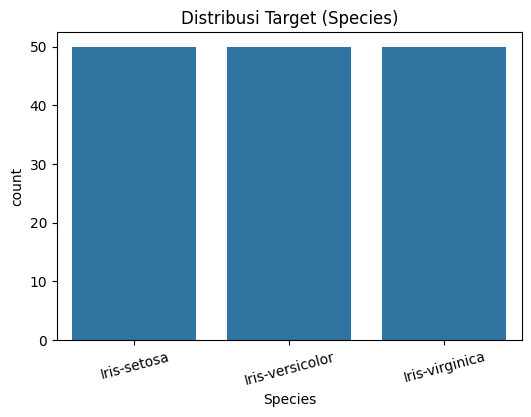

In [18]:
# 8. Visualisasi Distribusi Target
plt.figure(figsize=(6,4))
sns.countplot(x='Species', data=df)
plt.title('Distribusi Target (Species)')
plt.xticks(rotation=15)
plt.show()

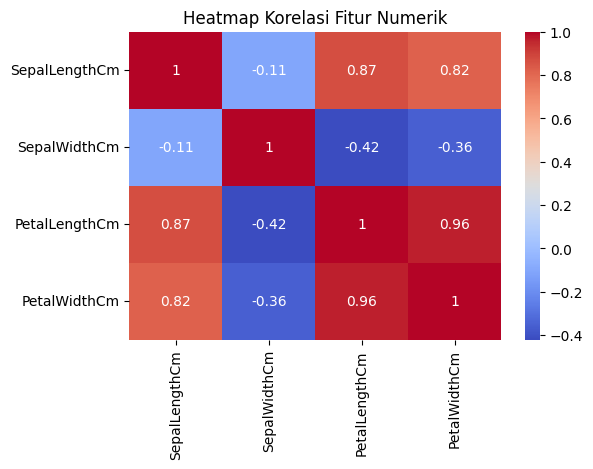

In [20]:
# 9. Korelasi Antar Fitur
plt.figure(figsize=(6,4))
sns.heatmap(df.drop('Species', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Fitur Numerik')
plt.show()

In [21]:
# 10. Encoding Target
df['Species'] = df['Species'].astype('category')
df['Species_code'] = df['Species'].cat.codes
df.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_code
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [22]:
# 11. Feature dan Target
X = df.drop(columns=['Species','Species_code'])
y = df['Species_code']

# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
X_train.shape, X_test.shape


((120, 4), (30, 4))

In [23]:
# 12. Pembuatan Model Decision Tree
model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=42)

In [24]:
# 13. Evaluasi Model
y_pred = model.predict(X_test)
print("Akurasi Model :", round(accuracy_score(y_test, y_pred)*100,2), "%")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(
    y_test, y_pred, target_names=df['Species'].cat.categories))


Akurasi Model : 93.33 %

Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



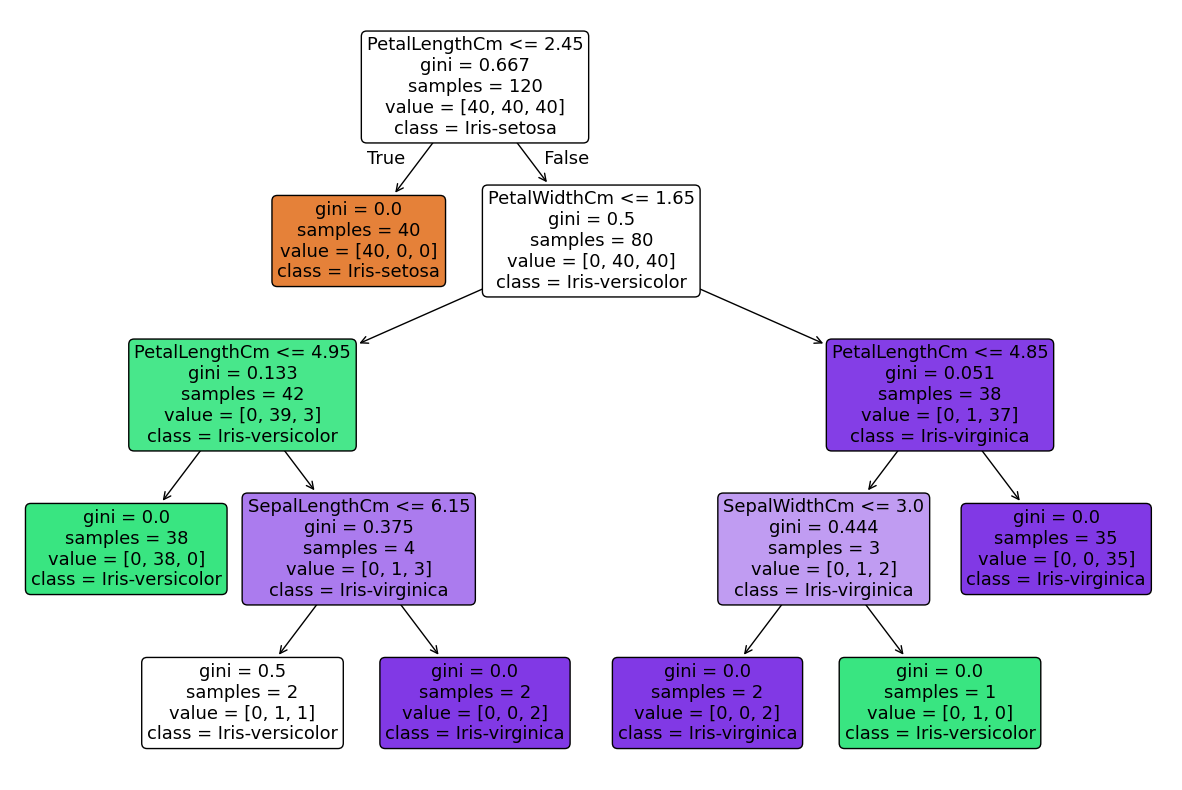

In [25]:
# 14. Visualisasi Decision Tree
plt.figure(figsize=(15,10))
plot_tree(model, feature_names=X.columns,
          class_names=df['Species'].cat.categories,
          filled=True, rounded=True)
plt.show()

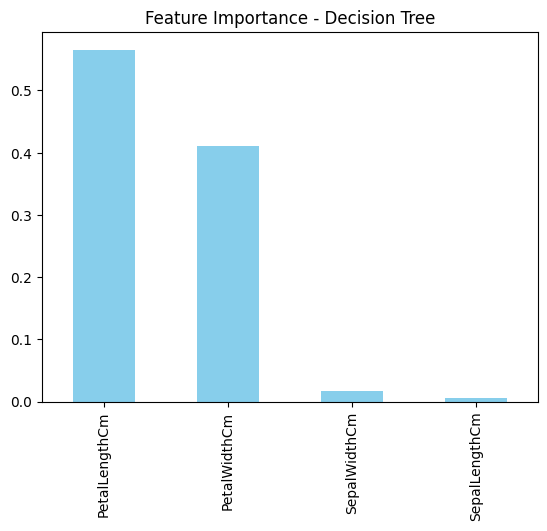

In [28]:
# 15. Feature Importance
imp = pd.Series(model.feature_importances_, index=X.columns)
imp.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Feature Importance - Decision Tree')
plt.show()


In [29]:
# 16. Prediksi Manual (Uji Data Testing)
sample_test = X_test.sample(5, random_state=1)
print("Data Uji:")
print(sample_test)
pred = model.predict(sample_test)
print("\nHasil Prediksi:", [df['Species'].cat.categories[i] for i in pred])


Data Uji:
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
69             5.6           2.5            3.9           1.1
140            6.7           3.1            5.6           2.4
107            7.3           2.9            6.3           1.8
138            6.0           3.0            4.8           1.8
7              5.0           3.4            1.5           0.2

Hasil Prediksi: ['Iris-versicolor', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa']
